
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
      n_samp = len(X)
      n_feat = len(X[0])      #number of data points rows and columns

      self.mean = np.zeros(n_feat)
      self.std = np.zeros(n_feat)

      #mean
      for j in range(n_feat):
            total = 0
            for i in range(n_samp):
                total += X[i][j]
            self.mean[j] = total / n_samp


       #std
      for j in range(n_feat):
            total = 0
            for i in range(n_samp):
                diff = X[i][j] - self.mean[j]
                total += diff * diff      # (x - mean)^2
            self.std[j] = (total / n_samp) ** 0.5


    def transform(self, X):
        n_samples = len(X)
        n_features = len(X[0])

        X_scaled = [[0]*n_features for _ in range(n_samples)]

        for i in range(n_samples):
            for j in range(n_features):
                X_scaled[i][j] = (X[i][j] - self.mean[j]) / self.std[j]        #stndardisataion

        return np.array(X_scaled)


    def fit_transform(self, X):
        self.fit(X)                      #scaling the data
        return self.transform(X)


In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr =lr

        self.epochs = epochs
        self.l2_lambda = l2_lambda   #l2 regularization

    def fit(self, X, y):
        n_samp = len(X)
        n_feat = len(X[0])

        self.w = np.zeros(n_feat)     #weight and bias set to 0
        self.b = 0

        self.losses =[]


        for _ in range(self.epochs):
            y_pred = [0] * n_samp               #forward pass
            for i in range(n_samp):
                y_pred[i] = self.b
                for j in range(n_feat):
                    y_pred[i] += self.w[j] * X[i][j]


            loss = 0                             #loss
            for i in range(n_samp):
                loss += (y[i] - y_pred[i]) ** 2

            loss = loss / n_samp


            reg = 0                                 #l2 regularization
            for j in range(n_feat):
                reg += self.w[j] ** 2

            loss += self.l2_lambda * reg
            self.losses.append(loss)


            dw = [0] * n_feat
            db = 0

            for i in range(n_samp):
                error = y[i] - y_pred[i]

                db += -2 * error      #bias gradient

                for j in range(n_feat):                 #weight gradient
                    dw[j] += -2 * error * X[i][j]


            for j in range(n_feat):
                dw[j] = (dw[j] / n_samp) + 2 * self.l2_lambda * self.w[j]

            db = db / n_samp

            for j in range(n_feat):
                self.w[j] -= self.lr * dw[j]

            self.b -= self.lr * db



    def predict(self, X):
         pred = []

         for i in range(len(X)):
            y_hat = self.b
            for j in range(len(X[0])):
                y_hat += self.w[j] * X[i][j]
            pred.append(y_hat)

         return np.array(pred)

In [ ]:
#deummy data
import random
x = []
y = []

for i in range(1, 51):
    x1 = i
    x2 = i + 1
    x.append([x1, x2])
    y.append(2 * x1 + 1 + random.uniform(-2, 2))


In [ ]:
scaler = StandardScalerManual()
x_scaled = scaler.fit_transform(x)

model = LinearRegressionManual(
    lr=0.01,
    epochs=100,
    l2_lambda=0.5
)

model.fit(x_scaled, y)
y_pred = model.predict(x_scaled)


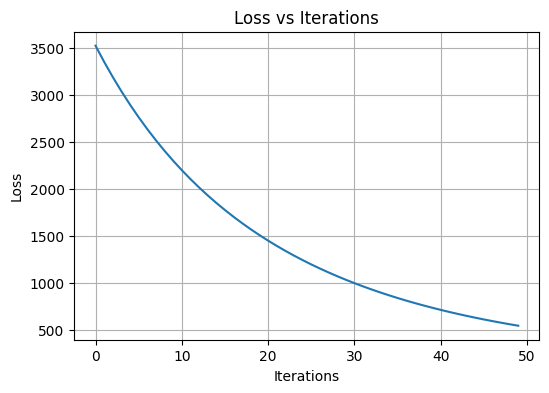

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(model.losses[:50])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid()
plt.show()


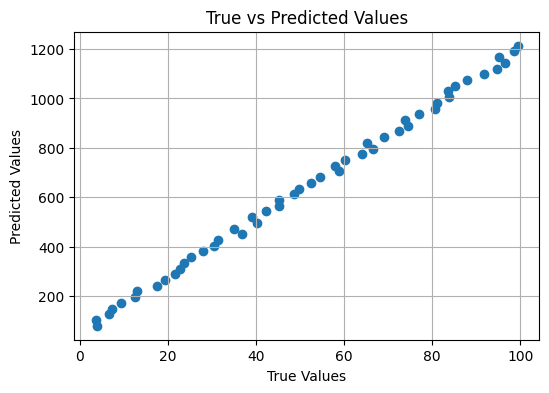

In [ ]:
y_pred = model.predict(x)
plt.figure(figsize=(6,4))
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.grid()
plt.show()

In [ ]:
lambdas = [0.0, 0.1, 1.0,2.0]   #diffrent lambdas
loss_dict = {}

for lam in lambdas:
    model = LinearRegressionManual(
        lr=0.01,
        epochs=500,
        l2_lambda=lam
    )

    model.fit(x_scaled, y)
    loss_dict[lam] = model.losses



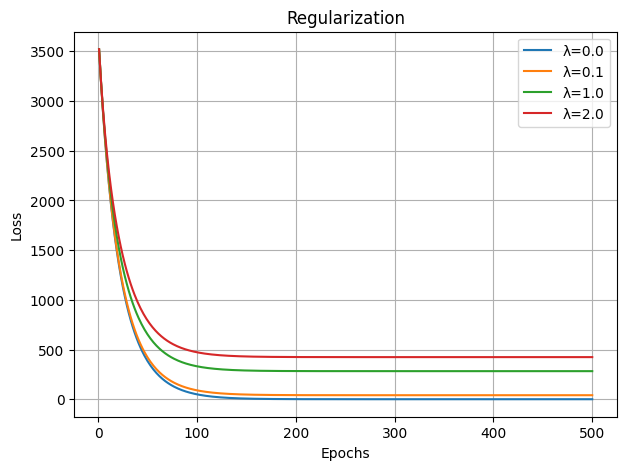

In [ ]:
plt.figure(figsize=(7,5))

epochs = range(1, 501)

for lam in lambdas:
    plt.plot(epochs, loss_dict[lam], label=f"λ={lam}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Regularization")
plt.legend()
plt.grid()
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:
import random

X = []
y = []

for i in range(1, 101):
    x1 = i
    x2 = i + random.uniform(-2, 2)
    X.append([x1, x2])

    # binary rule (important)
    y.append(1 if x1 + x2 > 100 else 0)


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
import math

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
         n_samp = len(X)
         n_feat = len(X[0])

         self.w = [0] * n_feat
         self.b = 0
         self.losses = []

         for _ in range(self.epochs):
            y_hat = [0] * n_samp
            #fprward pass
            for i in range(n_samp):
                z = self.b
                for j in range(n_feat):
                    z += self.w[j] * X[i][j]
                y_hat[i] = sigmoid(z)

           #loss
            loss = 0
            for i in range(n_samp):
                eps = 1e-15
                loss += -(y[i]*math.log(y_hat[i]+eps) +
                          (1-y[i])*math.log(1-y_hat[i]+eps))
            loss /= n_samp

            # L2 regularization
            reg = 0
            for j in range(n_feat):
                reg += self.w[j]**2
            loss += self.l2_lambda * reg

            self.losses.append(loss)

            # gradient
            dw = [0] * n_feat
            db = 0

            for i in range(n_samp):
                error = y_hat[i] - y[i]
                db += error
                for j in range(n_feat):
                    dw[j] += error * X[i][j]

            for j in range(n_feat):
                dw[j] = dw[j]/n_samp + 2*self.l2_lambda*self.w[j]
            db /= n_samp


            for j in range(n_feat):
                self.w[j] -= self.lr * dw[j]
            self.b -= self.lr * db


    def predict_proba(self, X):
        prob = []
        for i in range(len(X)):
            z = self.b
            for j in range(len(X[0])):
                z += self.w[j] * X[i][j]
            prob.append(sigmoid(z))
        return np.array(prob)

    def predict(self, X):
        prob = self.predict_proba(X)
        return np.array([1 if p >= 0.5 else 0 for p in prob])


In [ ]:
# using standardscaler
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [ ]:
model = LogisticRegressionManual(lr=0.01, epochs=200,l2_lambda=0.5)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)


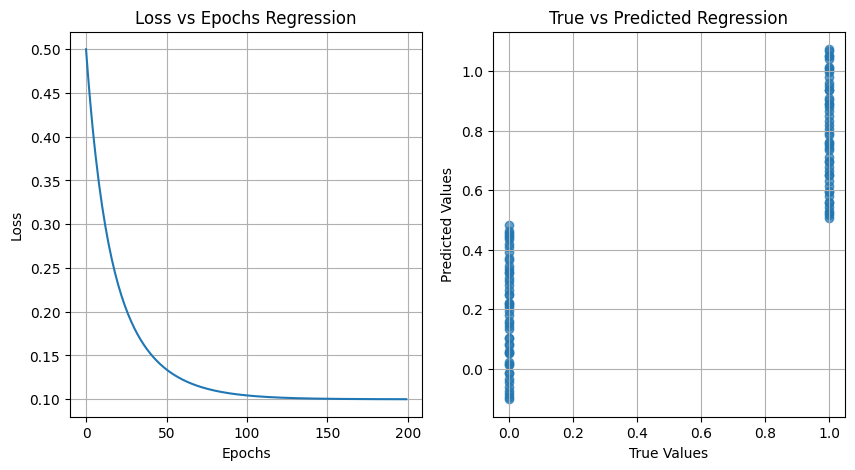

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs Regression")
plt.grid()


plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Regression")
plt.grid()

plt.show()


In [ ]:
y_pred = model.predict(X_scaled)

correct = 0
for i in range(len(y)):
    if y_pred[i] == y[i]:
        correct += 1

accuracy = correct / len(y)
print("Final Training Accuracy:", round(accuracy * 100, 2), "%")



Final Training Accuracy: 100.0 %


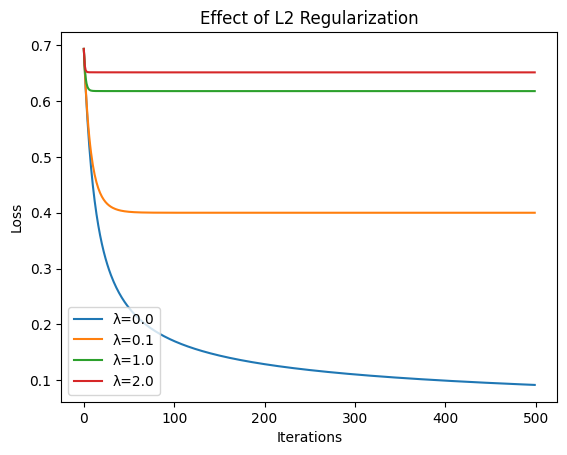

In [ ]:
for lam in [0.0, 0.1, 1.0,2.0]:
    model =  LogisticRegressionManual(lr=0.1, epochs=500, l2_lambda=lam)
    model.fit(X_scaled, y)
    plt.plot(model.losses, label=f"λ={lam}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Effect of L2 Regularization")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''


    n, m = M.shape
   #centroids
    all_values = []
    for i in range(n):
        for j in range(m):
            all_values.append(M[i][j])

    centroids = random.sample(all_values, k)

   #assignment table
    assignment_table = np.zeros((n, m), dtype=int)

    #iteration
    for _ in range(max_iters):
        changed = False

        # assgnment step
        for i in range(n):
            for j in range(m):
                min_dist = float('inf')
                assigned_cluster = 0

                for c in range(k):
                    dist = abs(M[i][j] - centroids[c])
                    if dist < min_dist:
                        min_dist = dist
                        assigned_cluster = c

                if assignment_table[i][j] != assigned_cluster:
                    changed = True

                assignment_table[i][j] = assigned_cluster

        # updating the step
        new_centroids = []

        for c in range(k):
            values = []
            for i in range(n):
                for j in range(m):
                    if assignment_table[i][j] == c:
                        values.append(M[i][j])

            # to tackle empty clusters
            if len(values) > 0:
                new_centroids.append(sum(values) / len(values))
            else:
                new_centroids.append(centroids[c])

        # convergence check
        if not changed:
            break

        centroids = new_centroids

    #cookbook
    cookbook = {}
    for c in range(k):
        cookbook[c] = []

    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i][j]
            cookbook[cluster_id].append((i, j))


    return assignment_table, cookbook, np.array(centroids)



In [ ]:
# Call the Function on a Matrix
np.random.seed(42)

# Example matrix
M = np.random.randint(0, 100, size=(6, 8))
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [ ]:
# Print Outputs
print("Original Matrix M:\n", M)

print("\nAssignment Table:")
print(assignment_table)

print("\nCentroids:")
print(centroids)

print("\nCookbook:")
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {positions}")


Original Matrix M:
 [[51 92 14 71 60 20 82 86]
 [74 74 87 99 23  2 21 52]
 [ 1 87 29 37  1 63 59 20]
 [32 75 57 21 88 48 90 58]
 [41 91 59 79 14 61 61 46]
 [61 50 54 63  2 50  6 20]]

Assignment Table:
[[0 2 1 2 0 1 2 2]
 [2 2 2 2 1 1 1 0]
 [1 2 1 0 1 0 0 1]
 [1 2 0 1 2 0 2 0]
 [0 2 0 2 1 0 0 0]
 [0 0 0 0 1 0 1 1]]

Centroids:
[54.26315789 15.06666667 83.92857143]

Cookbook:
Cluster 0: [(0, 0), (0, 4), (1, 7), (2, 3), (2, 5), (2, 6), (3, 2), (3, 5), (3, 7), (4, 0), (4, 2), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 5)]
Cluster 1: [(0, 2), (0, 5), (1, 4), (1, 5), (1, 6), (2, 0), (2, 2), (2, 4), (2, 7), (3, 0), (3, 3), (4, 4), (5, 4), (5, 6), (5, 7)]
Cluster 2: [(0, 1), (0, 3), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (2, 1), (3, 1), (3, 4), (3, 6), (4, 1), (4, 3)]


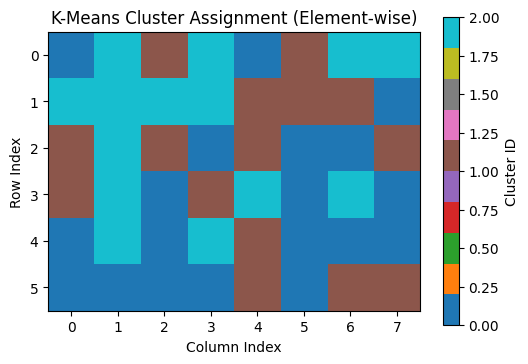

In [ ]:
# Visualize Cluster Assignments
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(assignment_table, cmap='tab10')
plt.colorbar(label='Cluster ID')
plt.title("K-Means Cluster Assignment (Element-wise)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
